import necessary lineraries pandas and matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('HR Project.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               740 non-null    int64 
 1   name                             740 non-null    object
 2   Gender                           740 non-null    object
 3   Education                        740 non-null    object
 4   Reason                           740 non-null    object
 5   BMI_Category                     740 non-null    object
 6   Season_Names                     740 non-null    object
 7   Month of absence                 740 non-null    int64 
 8   Day of the week                  740 non-null    object
 9   Transportation expense           740 non-null    int64 
 10  Son                              740 non-null    int64 
 11  Social_drinker                   740 non-null    object
 12  Social_smoker                    740

"""Replace 0 ,1 values with No ,Yes for columns [ Disciplinary failure ,'Social drinker ' , social smoker ]


In [5]:
 ## df['Disciplinary failure']= df['Disciplinary failure'].replace({'NO': 0,'yes': 1})
  ##df['Social smoker']= df['Social smoker'].replace({0:'Yes',1:'No'}).str.strip()
  ##df['Social drinker']= df['Social drinker'].replace({0:'No', 1:'Yes'},inplace=True)
 ## df.head()
 dic ={0:'No',1:'Yes'}
 df['Social_smoker']=df['Social_smoker'].map(dic)
 df['Social_drinker']=df['Social_drinker'].map(dic)
 df['Disciplinary failure']=df['Disciplinary failure'].map(dic)
 df.head()


,ID,name,Gender,Education,Reason,BMI_Category,Season_Names,Month of absence,Day of the week,Transportation expense,Son,Social_drinker,Social_smoker,Pet,Disciplinary failure,Age,Work load Average/day,Hit target,Distance from Residence to Work,Absenteeism time in hours
0,1,Dylan Miller,M,University,unjustified absence,Over Weight,Summer,7,Mon,289,2,NaN,NaN,1,No,33,239554,97,36,4
1,2,Mila Murphy,F,University,Unkown,Obese,Summer,7,Mon,118,1,NaN,NaN,0,Yes,50,239554,97,13,0
2,3,Abigail Walker,F,University,medical consultation,Obese,Summer,7,Tus,179,0,NaN,NaN,0,No,38,239554,97,51,2
3,4,Violet Brooks,F,University,Diseases of the eye and adnexa,Healthy Weight,Summer,7,Wen,279,2,NaN,NaN,0,No,39,239554,97,5,4
4,5,Michael Turner,M,University,medical consultation,Over Weight,Summer,7,Wen,289,2,NaN,NaN,1,No,33,239554,97,36,2


Insights
.1 *Absenteeism Trends*

In [6]:
month_names = {

    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Replace month numbers with names
df['Month'] = df['Month of absence'].map(month_names)

# Display the updated DataFram
df['Month']

,Month
0,July
1,July
2,July
3,July
4,July
...,...
735,July
736,July
737,May
738,May


In [7]:
# Convert 'Month' column to string type if it's not already
df['Month'] = df['Month'].astype(str)

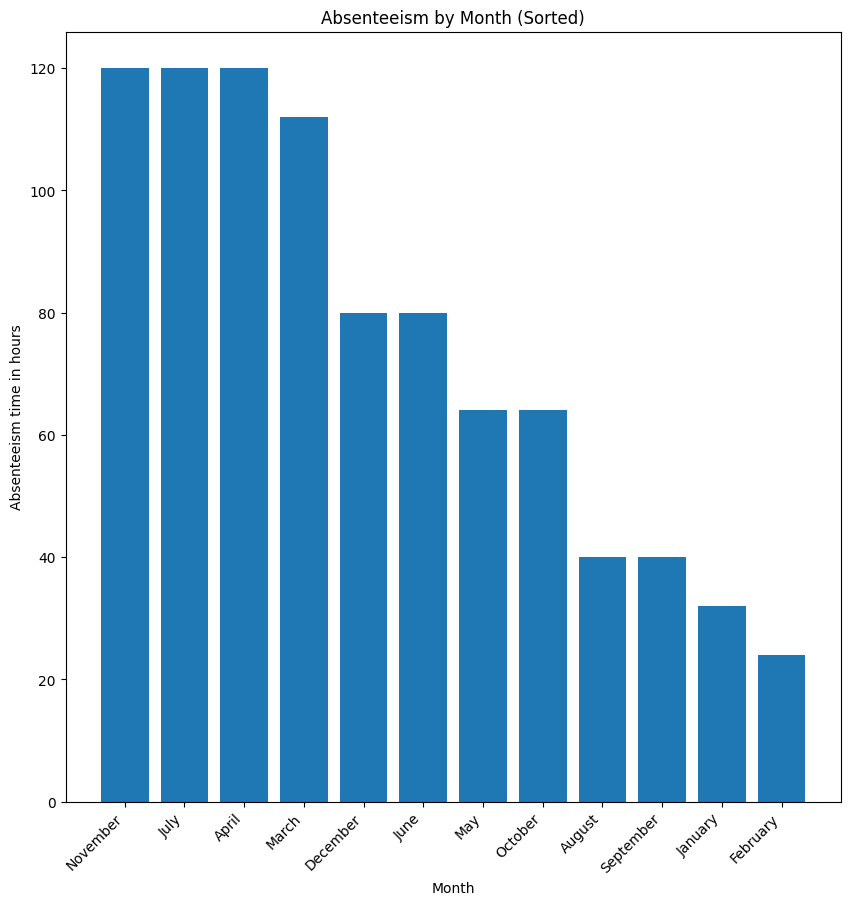

In [8]:
# Assuming 'df' is your DataFrame and 'Absenteeism time in hours' is the column you want to plot
plt.figure(figsize=(10, 10))

# Convert 'Month' column to string type if it's not already
df['Month'] = df['Month'].astype(str)

# Sort the DataFrame by 'Absenteeism time in hours' in descending order
df_sorted = df.sort_values('Absenteeism time in hours', ascending=False)

# Plot the bar chart using the sorted DataFrame
plt.bar(df_sorted['Month'], df_sorted['Absenteeism time in hours'])

plt.xlabel('Month')
plt.ylabel('Absenteeism time in hours')
plt.title('Absenteeism by Month (Sorted)')
plt.xticks(rotation=45, ha='right')

plt.show()

2 Absenteeism Trends by day of the week

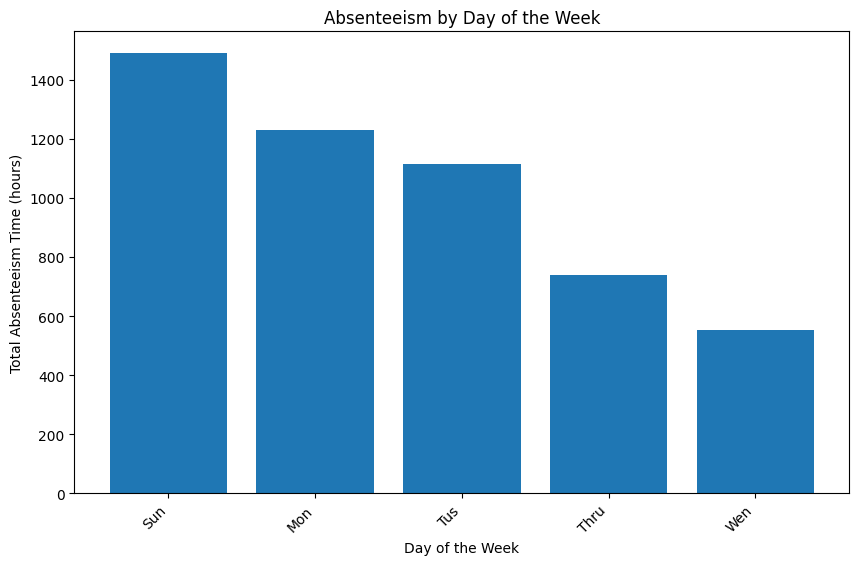

In [10]:
import calendar
# Convert 'Day of the week' to day names

#df['Day of the week'] = df['Day of the week'].apply(lambda x: calendar.day_name[x -1 ])  # Adjust index for day names (0-6)

# Group by day of the week and sum absenteeism hours
day_absenteeism = df.groupby('Day of the week')['Absenteeism time in hours'].sum().reset_index()

# Sort by total absenteeism hours (descending) for better visualization
day_absenteeism = day_absenteeism.sort_values('Absenteeism time in hours', ascending=False)


# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(day_absenteeism['Day of the week'], day_absenteeism['Absenteeism time in hours'])

plt.xlabel('Day of the Week')
plt.ylabel('Total Absenteeism Time (hours)')
plt.title('Absenteeism by Day of the Week')
plt.xticks(rotation=45, ha='right')

plt.show()

*Demographic Analysis*:
   - Examine how age, education, and other demographic factors correlate with absenteeism. For instance, are younger employees more likely to be absent compared to older employees?


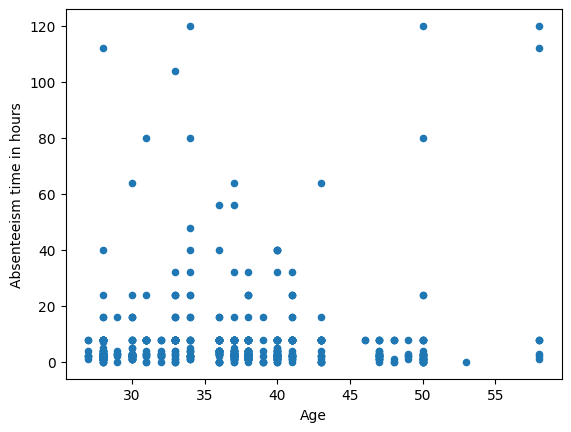

In [ ]:
df.plot(kind='scatter',x='Age',y='Absenteeism time in hours')
plt.show()


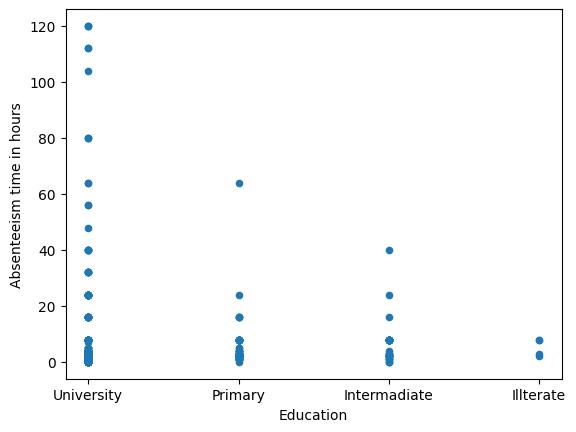

In [ ]:
df.plot(kind='scatter',x='Education',y='Absenteeism time in hours')
plt.show()

3. Gender Distrubtion

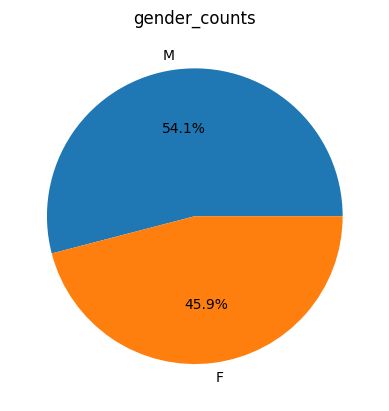

In [11]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('gender_counts')
plt.show()

In [13]:
gender_absenteeism = df.groupby('Gender')['Absenteeism time in hours'].mean().reset_index()

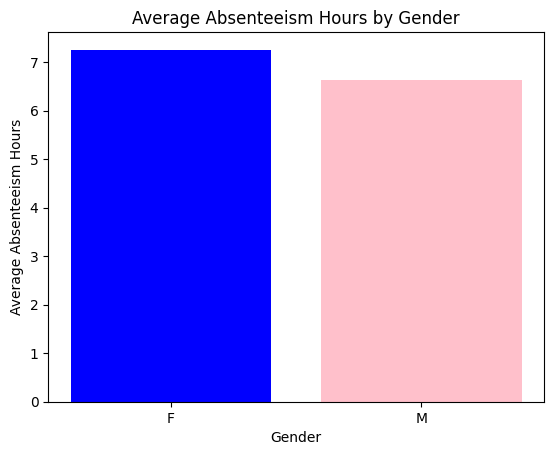

In [14]:
plt.bar(gender_absenteeism['Gender'], gender_absenteeism['Absenteeism time in hours'], color=['blue', 'pink'])
plt.title('Average Absenteeism Hours by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Absenteeism Hours')
plt.xticks(rotation=0)
plt.show()

4. *Workload and Targets*:
   - Investigate the relationship between workload average and absenteeism. Employees who consistently meet or exceed targets may have lower absenteeism rates compared to those who struggle.
   

5. *Health Metrics*:
   - Explore the impact of Body Mass Index (BMI), weight, and height on absenteeism. Higher BMI could correlate with health-related absences.

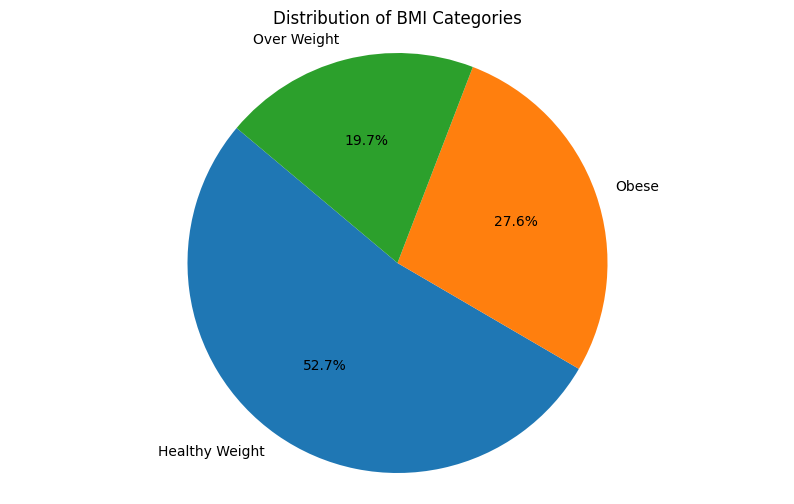

In [15]:
# Create a pie chart
bmi_counts = df['BMI_Category'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of BMI Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

6. *Lifestyle Factors*:
   - Assess the influence of social drinking and smoking habits on absenteeism. These factors might be linked to health issues that lead to more absences.

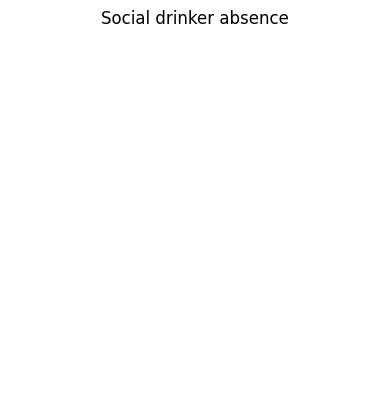

In [17]:
drink_counts = df['Social_drinker'].value_counts()

# Create a pie chart
plt.pie(drink_counts.values, labels=drink_counts.index, autopct='%1.1f%%')
plt.title('Social drinker absence')
plt.show()

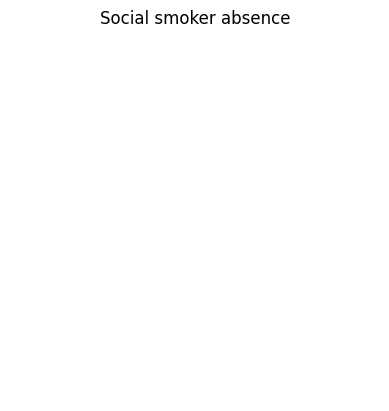

In [19]:
smoker_counts = df['Social_smoker'].value_counts()

# Create a pie chart
plt.pie(smoker_counts.values, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title('Social smoker absence')
plt.show()

7. *Disciplinary Issues*:
   - Consider the relationship between disciplinary failures and absenteeism. A correlation might suggest that employees facing disciplinary actions are more likely to be absent.


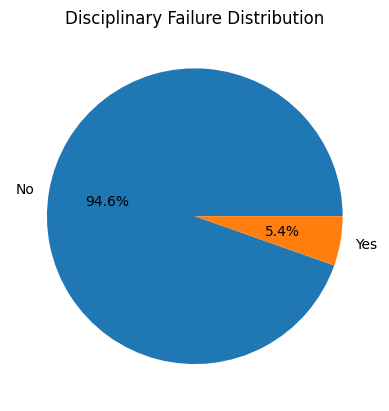

In [20]:

# Count the occurrences of each value in 'Disciplinary failure'
discipline_counts = df['Disciplinary failure'].value_counts()

# Create a pie chart
plt.pie(discipline_counts.values, labels=discipline_counts.index, autopct='%1.1f%%')
plt.title('Disciplinary Failure Distribution')
plt.show()

8. *Pet Ownership*:
   - Explore whether pet ownership impacts absenteeism. For example, employees with pets might take more time off for pet-related issues.

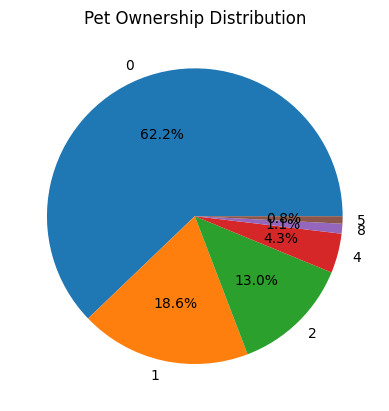

In [21]:
pet_counts = df['Pet'].value_counts()

# Create a pie chart
plt.pie(pet_counts.values, labels=pet_counts.index, autopct='%1.1f%%')
plt.title('Pet Ownership Distribution')
plt.show()

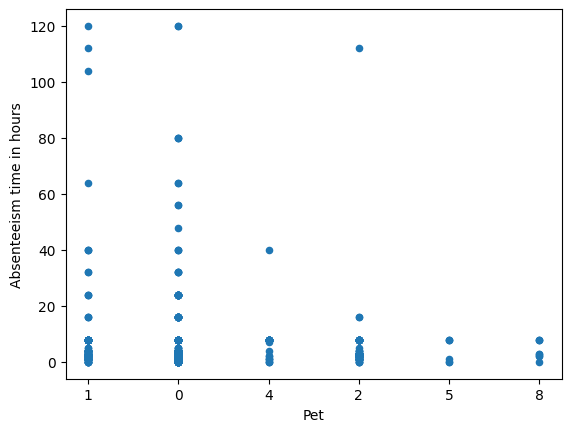

In [ ]:
# Convert 'Pet' column to string type before plotting
df['Pet'] = df['Pet'].astype(str)

# Now you can create the scatter plot
df.plot(kind='scatter', x='Pet', y='Absenteeism time in hours')
plt.show()

9. Number of sons

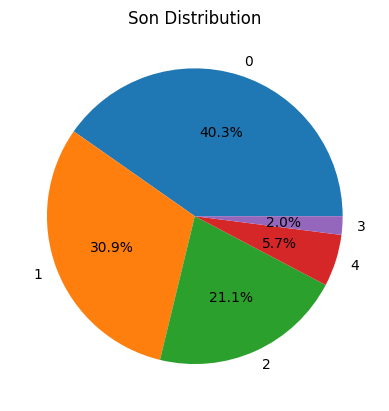

In [ ]:
son_counts = df['Son'].value_counts()

# Create a pie chart
plt.pie(son_counts.values, labels=son_counts.index, autopct='%1.1f%%')
plt.title('Son Distribution')
plt.show()

*Statistical Methods*:
    - Utilize regression analysis or machine learning models to identify significant predictors of absenteeism and develop strategies to mitigate it.

In [ ]:
df.describe()

,ID,comp/hr,Month of absence,Transportation expense (EGP/Month),Distance from Residence to Work (KM),Service time,Age,Work load Average/day,Hit target,Son,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,370.500000,38.828378,6.324324,221.329730,29.631081,12.554054,36.450000,271490.235135,94.587838,1.018919,79.035135,172.114865,26.677027,6.924324
std,213.763888,9.646331,3.436287,66.952223,14.836788,4.384873,6.478772,39058.116188,3.779313,1.098489,12.883211,6.034995,4.285452,13.330998
min,1.000000,22.000000,0.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,185.750000,31.000000,3.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,370.500000,39.000000,6.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,1.000000,83.000000,170.000000,25.000000,3.000000
75%,555.250000,47.000000,9.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,2.000000,89.000000,172.000000,31.000000,8.000000
max,740.000000,55.000000,12.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,4.000000,108.000000,196.000000,38.000000,120.000000
